In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

##### Load files from monthly averages

In [3]:
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)} 
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['votemper']


# Temporary list dict
data = {}

# Permanent aggregate dict
aggregates = {var: {} for var in variables}

# Loop through years
for year in tqdm(years):
    
    # Initialize lists
    for var in variables: data[var] = []
    
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)


# Calculate climatological mean and anomalies
for var in variables:
    aggregates[var]['mean'] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
    for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var]['mean']

In [4]:
print(np.shape(aggregates['votemper'][2015][:]))

(50, 50)


In [5]:
# Reset variables for plotting
tmask = tmask[0, 0, ...]
variables = ['votemper']

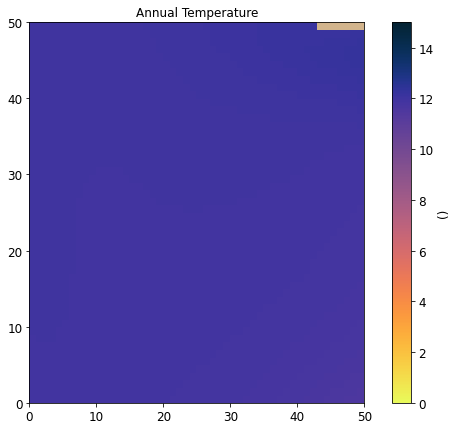

In [6]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')
vmin=0
vmax=15
cmap1=cmocean.cm.thermal_r
cmap1.set_bad('tan')
il=0

fig,ax=plt.subplots(1,1,figsize=(10,7))
#fig.suptitle('Annual Anomalies Mesozoop Feeding on Diatoms', fontsize=16)
m0=ax.pcolormesh(np.ma.masked_where(tmask==0,((aggregates['votemper']['mean']))),cmap=cmap1,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax,coords='grid')
ax.set_title('Annual Temperature')
fig.colorbar(m0,ax=ax,label='()')




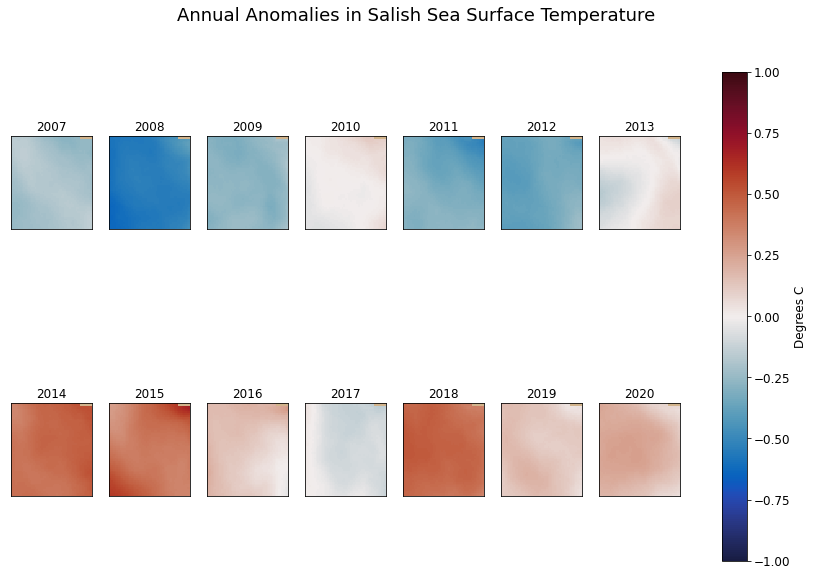

In [7]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
vmin=-1
vmax=1

fig,ax=plt.subplots(2,7,figsize=(15,9))
fig.suptitle('Annual Anomalies in Salish Sea Surface Temperature', fontsize=18)


m0=ax[0,0].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['votemper'][2007]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,0],coords='grid')
ax[0,0].set_title('2007')
ax[0,0].yaxis.set_visible(False)
ax[0,0].xaxis.set_visible(False)
ax[0,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

m0=ax[0,1].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['votemper'][2008]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,1],coords='grid')
ax[0,1].set_title('2008')
ax[0,1].yaxis.set_visible(False)
ax[0,1].xaxis.set_visible(False)
ax[0,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

m0=ax[0,2].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['votemper'][2009]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,2],coords='grid')
ax[0,2].set_title('2009')
ax[0,2].yaxis.set_visible(False)
ax[0,2].xaxis.set_visible(False)
ax[0,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

m0=ax[0,3].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['votemper'][2010]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,3],coords='grid')
ax[0,3].set_title('2010')
ax[0,3].yaxis.set_visible(False)
ax[0,3].xaxis.set_visible(False)
ax[0,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

m0=ax[0,4].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['votemper'][2011]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,4],coords='grid')
ax[0,4].set_title('2011')
ax[0,4].yaxis.set_visible(False)
ax[0,4].xaxis.set_visible(False)
ax[0,4].yaxis.set_visible(False)

m0=ax[0,5].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['votemper'][2012]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,5],coords='grid')
ax[0,5].set_title('2012')
ax[0,5].yaxis.set_visible(False)
ax[0,5].xaxis.set_visible(False)
ax[0,5].yaxis.set_visible(False)

m0=ax[0,6].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['votemper'][2013]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,6],coords='grid')
ax[0,6].set_title('2013')
ax[0,6].yaxis.set_visible(False)
ax[0,6].xaxis.set_visible(False)
ax[0,6].yaxis.set_visible(False)

m0=ax[1,0].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['votemper'][2014]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,0],coords='grid')
ax[1,0].set_title('2014')
ax[1,0].yaxis.set_visible(False)
ax[1,0].xaxis.set_visible(False)
ax[1,0].yaxis.set_visible(False)

m0=ax[1,1].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['votemper'][2015]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,1],coords='grid')
ax[1,1].set_title('2015')
ax[1,1].yaxis.set_visible(False)
ax[1,1].xaxis.set_visible(False)
ax[1,1].yaxis.set_visible(False)

m0=ax[1,2].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['votemper'][2016]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,2],coords='grid')
ax[1,2].set_title('2016')
ax[1,2].yaxis.set_visible(False)
ax[1,2].xaxis.set_visible(False)
ax[1,2].yaxis.set_visible(False)

m0=ax[1,3].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['votemper'][2017]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,3],coords='grid')
ax[1,3].set_title('2017')
ax[1,3].yaxis.set_visible(False)
ax[1,3].xaxis.set_visible(False)
ax[1,3].yaxis.set_visible(False)

m0=ax[1,4].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['votemper'][2018]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,4],coords='grid')
ax[1,4].set_title('2018')
ax[1,4].yaxis.set_visible(False)
ax[1,4].xaxis.set_visible(False)
ax[1,4].yaxis.set_visible(False)

m0=ax[1,5].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['votemper'][2019]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,5],coords='grid')
ax[1,5].set_title('2019')
ax[1,5].yaxis.set_visible(False)
ax[1,5].xaxis.set_visible(False)
ax[1,5].yaxis.set_visible(False)

m0=ax[1,6].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['votemper'][2020]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,6],coords='grid')
ax[1,6].set_title('2020')
ax[1,6].yaxis.set_visible(False)
ax[1,6].xaxis.set_visible(False)
ax[1,6].yaxis.set_visible(False)

fig.colorbar(m0,ax=ax,label='Degrees C')



##### In general, surface temperature reflects the NPGO + (cold year) pattern from 2007-2013 and NPGO - (warm year) pattern from 2014-2020; excpetion are 2010 (which was an El Niño year and 2017 which switched to La Niña conditions?

In [8]:

#years, months, data
monthly_array_temp_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['votemper']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}
# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2013,2014,2015, 2016, 2017, 2018, 2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)


In [9]:
monthly_array_temp_slice[monthly_array_temp_slice == 0 ] = np.nan
monthly_array_temp_slicemean = \
np.nanmean(np.nanmean(monthly_array_temp_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_temp_slicemean))

(14, 12)


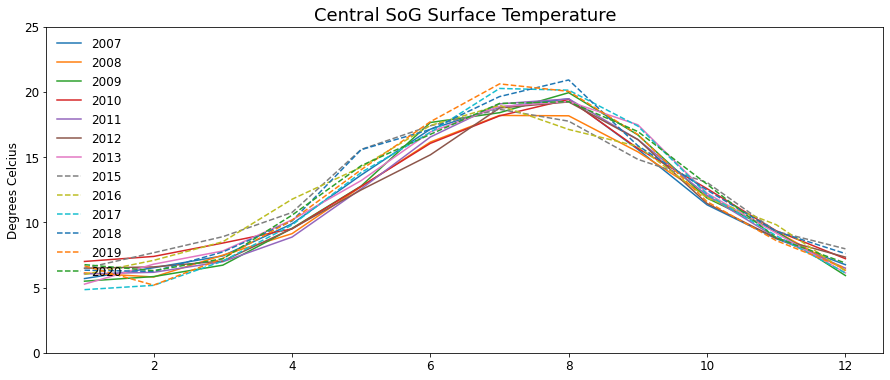

In [10]:
#plot monthly means for 5 years
fig, ax = plt.subplots(figsize=(15, 6))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


for i in range(0,7):
    ax.plot(np.arange(1,13), monthly_array_temp_slicemean[i,:],label=2007+i)
    ax.set_title('Central SoG Mesozooplankton Seasonal Cycle',fontsize=18)
    ax.legend(frameon=False)
    ax.set_ylim(0,25)
    ax.set_ylabel('\u03bcmol N')
   
for i in range(8,14):
    ax.plot(np.arange(1,13), monthly_array_temp_slicemean[i,:],linestyle='--',label=2007+i)
    ax.set_title('Central SoG Surface Temperature',fontsize=18)
    ax.legend(frameon=False)
    ax.set_ylim(0,25)
    ax.set_ylabel('Degrees Celcius')

In [11]:
NPGOpositive_temp=(((monthly_array_temp_slicemean[0,:]+monthly_array_temp_slicemean[1,:]+\
        monthly_array_temp_slicemean[2,:]+monthly_array_temp_slicemean[3,:]+\
        monthly_array_temp_slicemean[4,:]+monthly_array_temp_slicemean[5,:]+\
        monthly_array_temp_slicemean[6,:])/7))

In [12]:
NPGOpositive_temp

array([ 6.01452953,  6.44393855,  7.40939999,  9.51757422, 12.88082729,
       16.5206846 , 18.61458383, 19.27898007, 16.21853671, 11.93156244,
        9.07367994,  6.5958651 ])

In [13]:
NPGOnegative_temp=(((monthly_array_temp_slicemean[7,:]+monthly_array_temp_slicemean[8,:]+\
        monthly_array_temp_slicemean[9,:]+monthly_array_temp_slicemean[10,:]+\
        monthly_array_temp_slicemean[11,:]+monthly_array_temp_slicemean[12,:]+\
        monthly_array_temp_slicemean[13,:])/7))

In [14]:
NPGOnegative_temp

array([ 6.19263298,  6.22009274,  7.76171722, 10.47156539, 14.60015264,
       17.18910187, 19.55255539, 19.34261874, 16.44164049, 12.49713449,
        9.14100208,  6.92057754])

Text(0, 0.5, 'Degrees C')

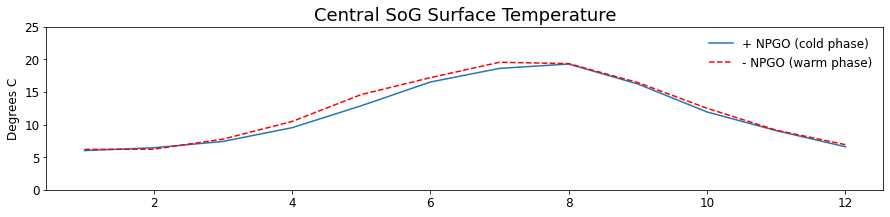

In [15]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), NPGOpositive_temp,label='+ NPGO (cold phase)')
ax.plot(np.arange(1,13), NPGOnegative_temp,linestyle='--',label='- NPGO (warm phase)',color='r')
ax.set_title('Central SoG Surface Temperature',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,25)
ax.set_ylabel('Degrees C')
   

#### Slightly higher surface temperatures from March-August for NPGO- (warm phase) years

In [16]:
NPGOcold=(((monthly_array_temp_slicemean[0,:]+\
        monthly_array_temp_slicemean[2,:]+monthly_array_temp_slicemean[6,:]+\
        monthly_array_temp_slicemean[7,:]+\
        monthly_array_temp_slicemean[9,:]+monthly_array_temp_slicemean[1,:]+\
        monthly_array_temp_slicemean[3,:]+\
        monthly_array_temp_slicemean[4,:]+monthly_array_temp_slicemean[5,:]+monthly_array_temp_slicemean[8,:])/10))

In [17]:
NPGOwarm=(((+monthly_array_temp_slicemean[10,:]+\
        monthly_array_temp_slicemean[11,:]+monthly_array_temp_slicemean[12,:]+\
        monthly_array_temp_slicemean[13,:])/4))

In [18]:
NPGOcold.mean()

11.879051782137859

In [19]:
NPGOwarm.mean()

12.13188464555197

Text(0, 0.5, 'Degrees C')

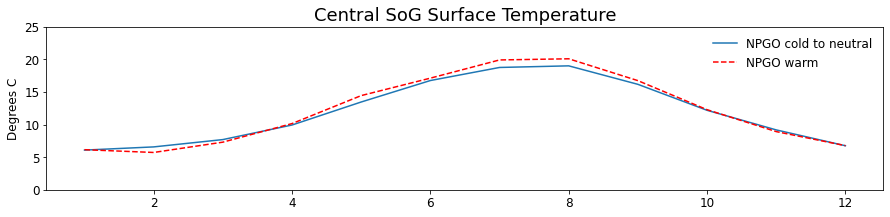

In [20]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), NPGOcold,label='NPGO cold to neutral')
ax.plot(np.arange(1,13), NPGOwarm,linestyle='--',label='NPGO warm',color='r')
ax.set_title('Central SoG Surface Temperature',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,25)
ax.set_ylabel('Degrees C')
   

In [35]:
NPGO_N=(((monthly_array_temp_slicemean[0,:]+\
        monthly_array_temp_slicemean[2,:]+monthly_array_temp_slicemean[6,:]+\
        monthly_array_temp_slicemean[7,:]+\
        monthly_array_temp_slicemean[9,:])/5))

In [36]:
NPGO_C=(((+monthly_array_temp_slicemean[1,:]+\
        monthly_array_temp_slicemean[3,:]+\
        monthly_array_temp_slicemean[4,:]+monthly_array_temp_slicemean[5,:])/4))

In [37]:
NPGO_W=(((+monthly_array_temp_slicemean[8,:]+monthly_array_temp_slicemean[10,:]+\
        monthly_array_temp_slicemean[11,:]+monthly_array_temp_slicemean[12,:]+\
        monthly_array_temp_slicemean[13,:])/5))

Text(0, 0.5, 'Degrees C')

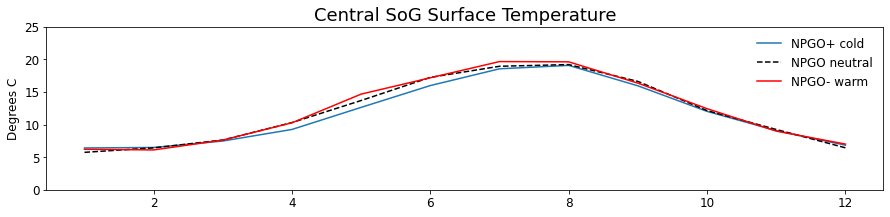

In [38]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), NPGO_C,label='NPGO+ cold ')
ax.plot(np.arange(1,13), NPGO_N,linestyle='--',label='NPGO neutral',color='k')
ax.plot(np.arange(1,13), NPGO_W,linestyle='-',label='NPGO- warm',color='r')
ax.set_title('Central SoG Surface Temperature',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,25)
ax.set_ylabel('Degrees C')

In [21]:
NoMHW_temp=(((monthly_array_temp_slicemean[0,:]+monthly_array_temp_slicemean[1,:]+\
        monthly_array_temp_slicemean[2,:]+monthly_array_temp_slicemean[3,:]+\
        monthly_array_temp_slicemean[4,:]+monthly_array_temp_slicemean[5,:]+\
        monthly_array_temp_slicemean[6,:]+monthly_array_temp_slicemean[7,:]+monthly_array_temp_slicemean[10,:]+\
        monthly_array_temp_slicemean[11,:]+monthly_array_temp_slicemean[12,:]+\
        monthly_array_temp_slicemean[13,:])/12))

In [22]:
MHW_temp=(((monthly_array_temp_slicemean[8,:]+monthly_array_temp_slicemean[9,:])/2))

Text(0, 0.5, '')

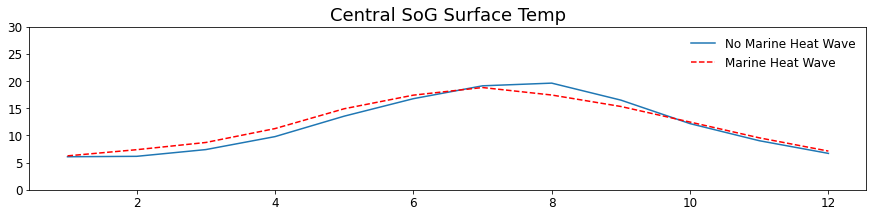

In [23]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), NoMHW_temp,label='No Marine Heat Wave')
ax.plot(np.arange(1,13), MHW_temp,linestyle='--',label='Marine Heat Wave',color='r')
ax.set_title('Central SoG Surface Temp',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,30)
ax.set_ylabel('')

In [28]:
SOIneg_temp=(((monthly_array_temp_slicemean[0,:]+monthly_array_temp_slicemean[3,:]+\
        monthly_array_temp_slicemean[8,:]+monthly_array_temp_slicemean[9,:]+monthly_array_temp_slicemean[10,:]+\
        monthly_array_temp_slicemean[12,:]+\
        monthly_array_temp_slicemean[13,:])/7))

In [29]:
SOIpos_temp=(((monthly_array_temp_slicemean[1,:]+\
        monthly_array_temp_slicemean[2,:]+\
        monthly_array_temp_slicemean[4,:]+monthly_array_temp_slicemean[5,:]+\
        monthly_array_temp_slicemean[6,:]+monthly_array_temp_slicemean[7,:]+\
        monthly_array_temp_slicemean[11,:])/7))

Text(0, 0.5, '')

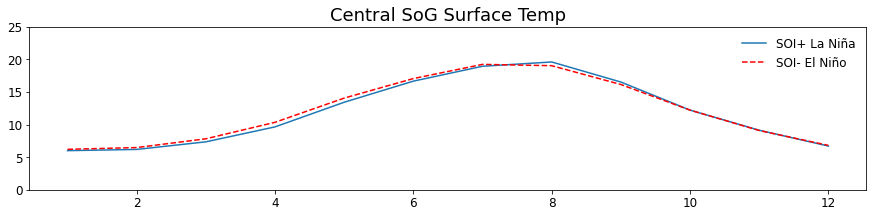

In [34]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), SOIpos_temp,label='SOI+ La Niña')
ax.plot(np.arange(1,13), SOIneg_temp,linestyle='--',label='SOI- El Niño',color='r')
ax.set_title('Central SoG Surface Temp',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,25)
ax.set_ylabel('')